In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 환율 데이터 불러오기
df_usd_krw = pd.read_csv('new_data/USD_KRW(1981.5월부터).csv')

In [3]:
# 불러온 데이터 범위 정하기 (2004년 1월 1일부터 2026년 2월 1일까지)
df_usd_krw['날짜'] = pd.to_datetime(df_usd_krw['날짜'])
df_usd_krw = df_usd_krw[(df_usd_krw['날짜'] >= '2004-01-01') & (df_usd_krw['날짜'] <= '2026-02-01')]

In [4]:
# 날짜 정렬 (과거 -> 현재)
df_usd_krw = df_usd_krw.sort_values(by='날짜')

# 날짜를 인덱스로 설정
df_usd_krw.set_index('날짜', inplace=True)

In [5]:
# 종가만 사용
# 종가 컬럼의 쉼표 제거 및 숫자 변환
df_usd_krw['종가'] = df_usd_krw['종가'].str.replace(',', '').astype(float)

In [6]:
# 결측치 처리
# 결측지 확인 및 제거
df_usd_krw['종가'] = df_usd_krw['종가'].ffill()

In [7]:
# 12개월 누적 로그 변화율 계산
# 공식: ln(현재 종가) - ln(12개월 전 종가)
df_usd_krw['log_price'] = np.log(df_usd_krw['종가'])
df_usd_krw['12m_log_return'] = df_usd_krw['log_price'].diff(12)  # 12개월(1년) 차분

In [8]:
# Z-Score 계산 (부호 반전 적용)
# 전체 기간의 평균과 표준편차 사용
mean_return = df_usd_krw['12m_log_return'].mean()
std_return = df_usd_krw['12m_log_return'].std()

In [9]:
# Z-score 계산 후 -1을 곱함
df_usd_krw['z_score'] = -1 * ((df_usd_krw['12m_log_return'] - mean_return) / std_return)

In [10]:
# 결과 확인
print(df_usd_krw[['종가', '12m_log_return', 'z_score']].tail())

                 종가  12m_log_return   z_score
날짜                                           
2025-10-01  1429.22        0.040437 -0.301308
2025-11-01  1467.62        0.050984 -0.407616
2025-12-01  1440.62       -0.024790  0.356117
2026-01-01  1450.80       -0.004463  0.151240
2026-02-01  1451.28       -0.007223  0.179050


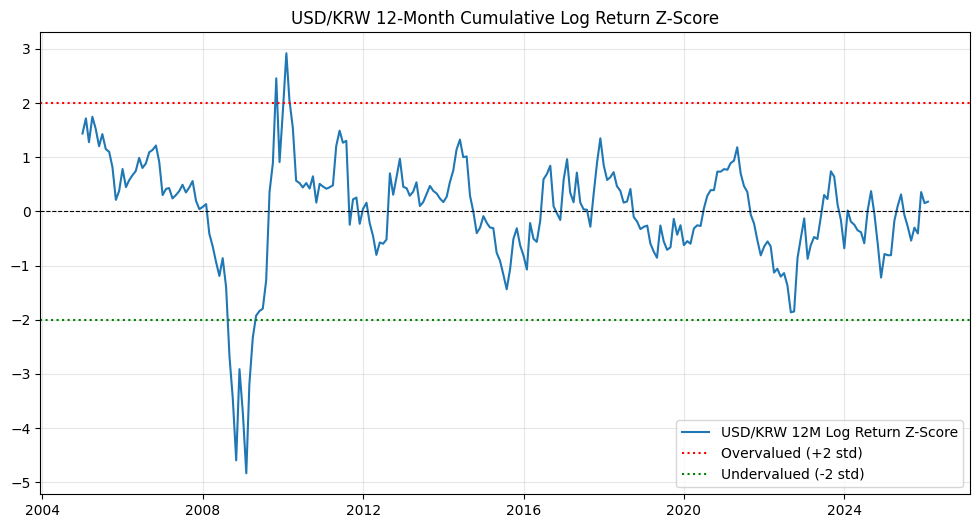

In [11]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_usd_krw.index, df_usd_krw['z_score'], label='USD/KRW 12M Log Return Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='Overvalued (+2 std)')
plt.axhline(-2, color='green', linestyle=':', label='Undervalued (-2 std)')
plt.title('USD/KRW 12-Month Cumulative Log Return Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# CSV 파일 저장
output_filename = 'new_data/new_data_z_score/USD_KRW_z_score.csv'
df_usd_krw.to_csv(output_filename, encoding='utf-8-sig') # 한글 깨짐 방지를 위해 utf-8-sig 사용
print(f"'{output_filename}' 파일이 저장되었습니다.")

'new_data/new_data_z_score/USD_KRW_z_score.csv' 파일이 저장되었습니다.
